# Reverifying accuracy on methods established in causal gateways and mediators in complex spatio-temporal system.

## Abstract

In the intricate spatio-temporal framework characterizing Earth's climatic system, extreme natural occurrences or deliberate geo-engineering interventions can induce either amplifying or attenuating perturbations via specific causal nexus regions. Within the confines of this manuscript, we aim to ascertain the accuracy and delineate the benchmark established in the referenced work [1]. Our discourse commences with an in-depth examination of the data acquisition methodology, followed by a rigorous data analysis phase. Subsequently, we delve into dimensionality reduction techniques tailored for enhanced computational efficiency, culminating in a comprehensive overview of the causal reconstruction process.

In [8]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
# documentation: https://unidata.github.io/netcdf4-python/
from netCDF4 import Dataset
from geoFieldData import *

## 1. Data Analysis

The data for this project comes from NOAA Physical Sciences Laboratory under NCEP/NCAR Reanalysis project. The dataset contains air temperature data, represented in the unit "degK" (degrees Kelvin). The data is a slice from a netCDF file named 'air.4Xday.1981-2010.ltm.nc'. This specific slice represents temperature values for a particular time instance and level (possibly an altitude or depth), over a grid defined by certain latitude and longitude ranges.The temperature matrix displays values across 11 longitudes (columns) and 11 latitudes (rows). The values range from approximately 244.31K to 276.04K. These temperatures can provide insights into climatic conditions, temperature variations, and potentially highlight specific geographic patterns or anomalies.

In [9]:
data = Dataset('data/air.4Xday.1981-2010.ltm.nc')
air_data = data.variables['air']
print(f"Data units {air_data.units}")
# Extracting a specific slice from the air_data:
# - The first index '0' refers to the first time instance in the dataset.
# - The second index '0' refers to the first level (which could be altitude or depth).
# - The range '9:20' slices the data for latitudes from the 9th index up to (but not including) the 20th index.
# - The range '29:40' slices the data for longitudes from the 29th index up to (but not including) the 40th index.
slice_data = air_data[0, 0, 9:20, 29:40]

print(slice_data)

Data units degK
[[249.86401 249.23668 248.50368 247.68668 246.84067 246.06367 245.38667
  244.88    244.557   244.36002 244.31334]
 [250.90034 250.15668 249.37334 248.63667 247.99701 247.46335 247.01668
  246.62367 246.27368 245.93668 245.64001]
 [252.46034 251.48668 250.69034 250.20668 250.05334 250.07034 250.10367
  249.95334 249.53033 248.89334 248.16034]
 [254.46701 253.207   252.36034 252.08334 252.36334 252.92368 253.42368
  253.537   253.1     252.18668 251.10667]
 [256.42334 255.05368 254.20001 254.03334 254.54001 255.36368 256.1067
  256.41333 256.11002 255.287   254.24   ]
 [257.64334 256.7     256.27335 256.444   257.10666 257.97702 258.73334
  259.1367  259.08035 258.66034 258.02667]
 [258.55734 258.57034 259.00034 259.737   260.57    261.29333 261.79333
  262.05667 262.11002 262.00333 261.72034]
 [260.90067 261.70367 262.69    263.63    264.25034 264.47333 264.33368
  264.087   263.877   263.687   263.377  ]
 [265.6667  266.4337  267.05334 267.35    267.17334 266.52036 265

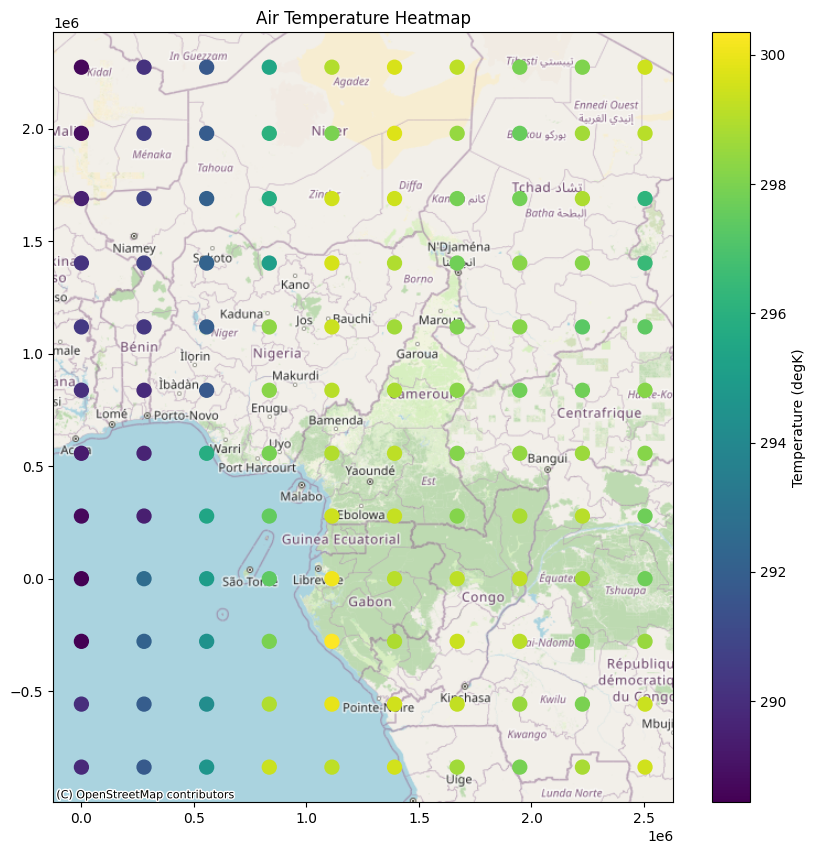

In [10]:
data = Dataset('data/air.4Xday.1981-2010.ltm.nc')
# Extracting a slice of temperature data for a specific level (0) and latitude (9:20) & longitude (29:60) ranges.
data_slice = get_data_slice(data, (28, 40), (0, 10), level_index=0)
plot_on_basemap(data_slice)

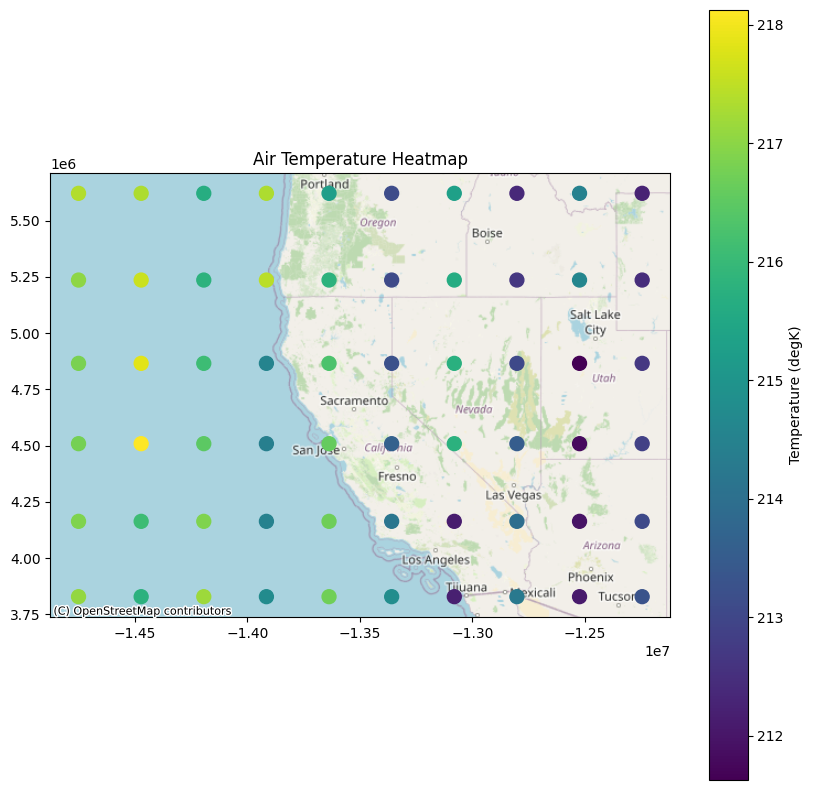

In [11]:
data_slice = get_data_slice(data, (18, 24), (91, 101), level_index=10)
plot_on_basemap(data_slice)